In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/iqQgED9vV7k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Using handwritten data from keras

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

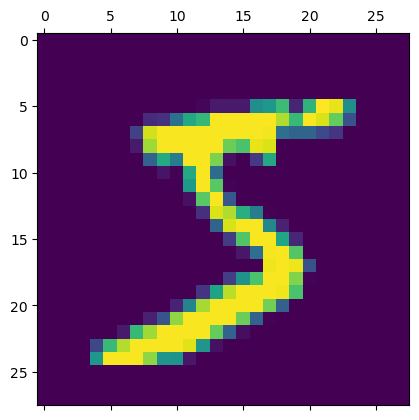

In [8]:
plt.matshow(X_train[0])

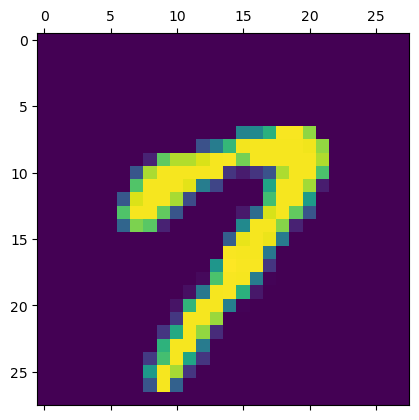

In [9]:
plt.matshow(X_train[15])

In [10]:
Y_train[15]

7

In [11]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training dataset

* reshape so that the 28x28 features of each of the observation are in one vector i.e.
    * move from 60000*28*28 -> 60000*784

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train/ 255
X_test = X_test / 255 # standardizing

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28 )
X_test_flattened = X_test.reshape(len(X_test),28*28 )
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Create a simple neural network
    * dense means each feauture is connected to each hidden layer
    * output: 10 (0, 1, .., 9),
    * input the 28*28 =784 flattened features 

In [17]:
model = keras.Sequential([
keras.layers.Dense(10, input_shape= (784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4722 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9261


* evaluate the model on the test dataset

In [18]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2686 - accuracy: 0.9232


[0.2685926854610443, 0.9232000112533569]

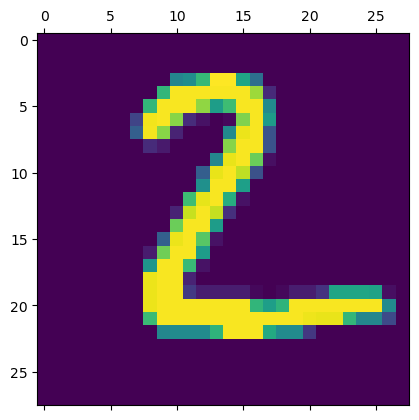

In [19]:
plt.matshow(X_test[1])

In [20]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [21]:
Y_predicted[1]

array([3.1186581e-01, 1.0264775e-02, 9.9895102e-01, 4.6224841e-01,
       7.7148182e-10, 8.3612794e-01, 8.7274659e-01, 1.1402354e-12,
       1.5448932e-01, 3.3016141e-09], dtype=float32)

In [22]:
np.argmax(Y_predicted[1])

2

* confusion mmatrix

In [23]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,   11,  923,   16,   10,    6,   13,   10,   32,    6],
       [   1,    0,   17,  932,    0,   19,    2,   11,   17,   11],
       [   1,    2,    4,    1,  914,    0,    9,    4,    5,   42],
       [   9,    3,    2,   38,   12,  775,   11,    8,   25,    9],
       [  10,    3,    6,    1,    9,   19,  906,    2,    2,    0],
       [   1,    6,   21,    8,    7,    0,    0,  952,    1,   32],
       [   8,   16,    6,   32,   10,   36,    9,   13,  830,   14],
       [  11,    7,    1,    9,   26,    8,    0,   23,    3,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

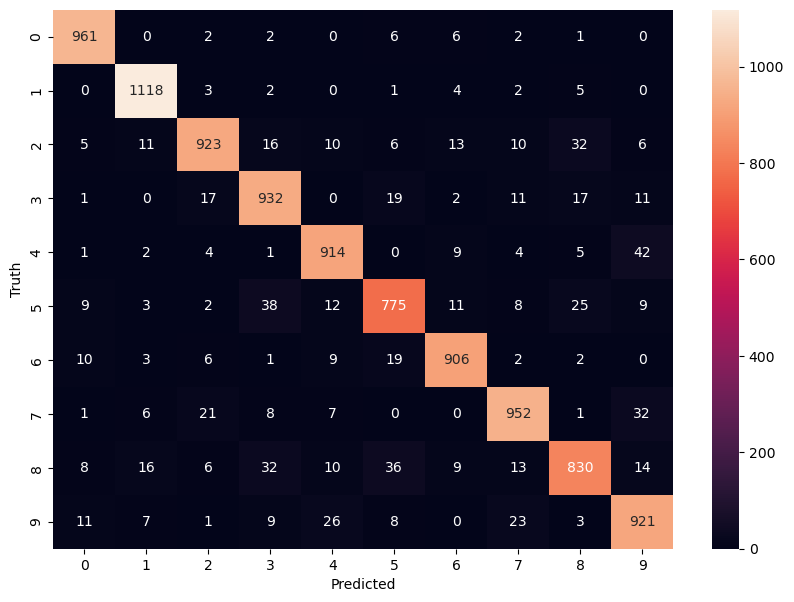

In [25]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add a hidden layer

In [26]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2761 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1248 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9839


In [27]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9753


[0.08349695801734924, 0.9753000140190125]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

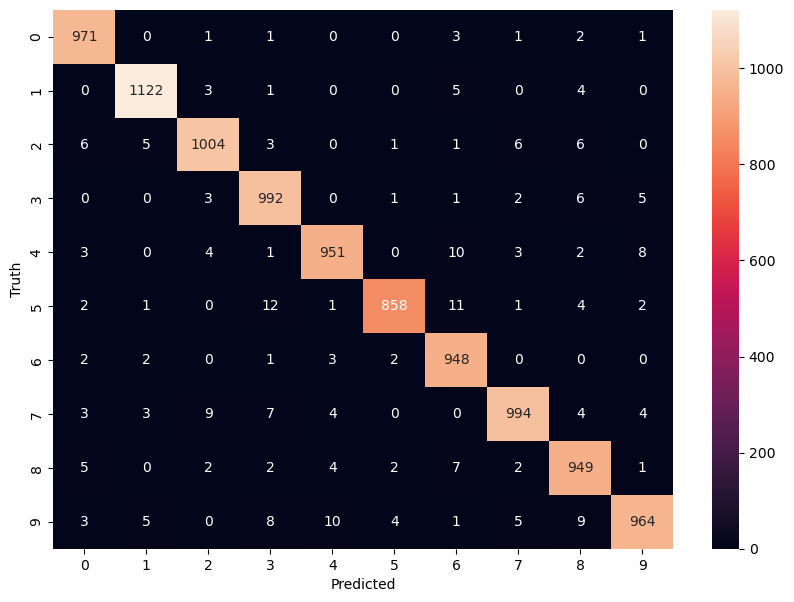

In [28]:

Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## flatten automatically from keras
## visualize how neural networks trains itself using Tensorboard

In [29]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9SdLOcGnebU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [159]:
#conda install -c conda-forge tensorboard

In [30]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

# tensorboard
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logsv2/", histogram_freq=1)


model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, Y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6717 - accuracy: 0.8284
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.9043
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.9178
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2636 - accuracy: 0.9265
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2415 - accuracy: 0.9320


In [32]:
%load_ext tensorboard
%tensorboard --logdir logsv2/train/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Activation Functions

In [162]:
import math

def sigmoid(x):
    return 1/ (1 + math.exp(-x))

In [163]:
sigmoid(1246)

1.0

In [164]:
sigmoid(1)

0.7310585786300049

In [165]:
sigmoid(-56)

4.780892883885469e-25

* gradient of sigmoid: tanh

In [166]:
def tanh(x):
    return (math.exp(x) - math.exp(-x))/ (math.exp(x) + math.exp(-x))

In [167]:
tanh(-56)

-1.0

In [168]:
tanh(50)

1.0

* ReLU

In [169]:
def relu(x):
    return max(0, x)

In [170]:
relu(-7)

0

In [171]:
relu(100)

100

* Leaky relu

In [172]:
def leaky_relu(x):
    return max(0.1*x, x)

In [173]:
leaky_relu(-100)

-10.0

In [174]:
leaky_relu(8)

8